### This notebook produces the content in the slides
### Also follows the same order

### set seed to ensure reproducibility

In [ ]:
# Seed value (can actually be different for each attribution step)
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from warnings import filterwarnings

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 500)
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('sample_data/fraud_sim_data_v6.txt', sep ="|" )
df.shape

(48588, 10)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(48588, 10)

In [ ]:
df.head()

,claim_number,process_date,specialty,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,process_ym,process_month,process_year,process_dom,process_dow,billed_amount_rank,bill_allow_diff,distance_bin,member_age2,age_bin
0,434549367,2017-01-01,OPHTHALMOLOGY,221.230,219.550,3,M,25.000,0,0,0.000,2017-01,1,2017,1,6,0.862,1.680,grp1: 1-4,25.000,grp4: 19-30
1,456540132,2017-01-01,HEMATOLOGY/ONCOLOGY,158.460,156.100,6,F,5.000,0,0,0.000,2017-01,1,2017,1,6,0.047,2.360,grp2: 5-9,5.000,grp1: 1-5
2,622006111,2017-01-01,GASTROENTEROLOGY,38.810,37.430,10,M,33.000,0,0,0.000,2017-01,1,2017,1,6,0.128,1.380,grp3: 10-24,33.000,grp5: 31-44
3,309919357,2017-01-01,NEUROLOGY,323.550,331.700,8,M,8.000,0,0,0.000,2017-01,1,2017,1,6,0.471,-8.150,grp2: 5-9,8.000,grp2: 6-11
4,220920202,2017-01-01,PSYCHIATRY,29.350,30.370,0,M,6.000,0,1,30.370,2017-01,1,2017,1,6,0.265,-1.020,grp0: 0,6.000,grp2: 6-11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48588 entries, 0 to 48587
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   claim_number     48588 non-null  int64  
 1   process_date     48588 non-null  object 
 2   specialty        48588 non-null  object 
 3   billed_amount    48588 non-null  float64
 4   allowed_amount   48588 non-null  float64
 5   drive_distance   48588 non-null  int64  
 6   provider_gender  43688 non-null  object 
 7   member_age       41196 non-null  float64
 8   isFraud          48588 non-null  int64  
 9   claim_disputed   48588 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 3.8+ MB


### Facts or statistics - Overall

In [ ]:
print(df['process_date'].min())
print(df['process_date'].max())

2017-01-01
2019-12-31


In [ ]:
df['claim_disputed'] = df['claim_disputed'].astype(int)
print(df['claim_disputed'].mean())
print(df['isFraud'].sum()/df['claim_disputed'].sum())

0.09208034905738043
0.4812248547161377


In [ ]:
df['disputed_amount'] = df['claim_disputed']*df['allowed_amount']
print(df[(df['claim_disputed']==1) & (df['isFraud']==0)]['disputed_amount'].sum())
print(df[(df['claim_disputed']==1) & (df['isFraud']==0)]['disputed_amount'].sum()/36)

1311288.96
36424.69333333333


### process date to plot trend

In [ ]:
df['process_date'] = pd.to_datetime(df['process_date'])
df['process_ym'] = df['process_date'].dt.to_period('M')
df['process_month'] = df['process_date'].dt.month
df['process_year'] = df['process_date'].dt.year
df['process_dom'] = df['process_date'].dt.day
df['process_dow'] = df['process_date'].dt.day_of_week

<Axes: xlabel='process_ym'>

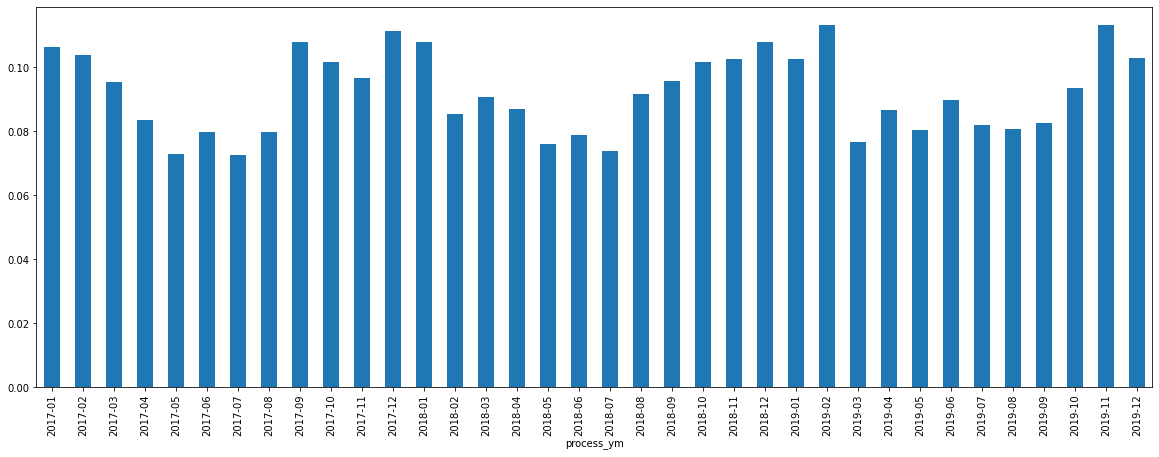

In [ ]:
plt.figure(figsize=(20,7))
df.groupby('process_ym')['claim_disputed'].mean().plot.bar()

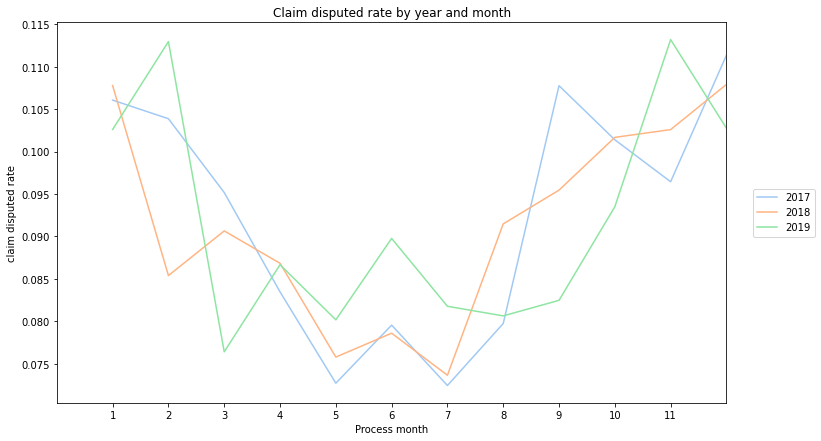

In [ ]:
years = df['process_date'].dt.year.unique()
colors = sns.color_palette('pastel', n_colors=len(years))  # get a number of colors
cmap = dict(zip(years, colors))  # zip values to colors

plt.figure(figsize=(12,7))
for year in years:  # withing the month plot each year
    data = df[df['process_year'] == year]
    sns.lineplot(data=data, x='process_month', y='claim_disputed', err_style=None, hue=year, palette=cmap)
plt.xlim(0, 12)
plt.xticks(range(1, 12))
plt.title('Claim disputed rate by year and month')
plt.xlabel('Process month')
plt.ylabel('claim disputed rate')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()
# There seem to be month of the year seasonality

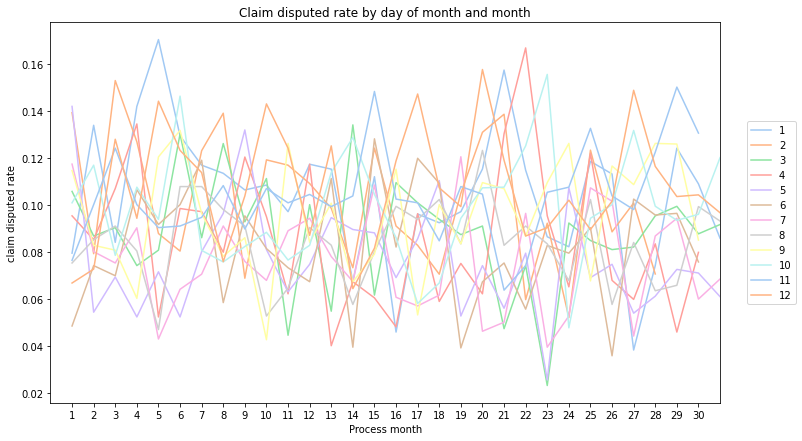

In [ ]:
# day of month effect
months = df['process_month'].unique()
colors = sns.color_palette('pastel', n_colors=len(months))  # get a number of colors
cmap = dict(zip(months, colors))  # zip values to colors

plt.figure(figsize=(12,7))
for month in months:  # withing the month plot each month
    data = df[df['process_month'] == month]
    sns.lineplot(data=data, x='process_dom', y='claim_disputed', err_style=None, hue=month, palette=cmap)
plt.xlim(0, 31)
plt.xticks(range(1, 31))
plt.title('Claim disputed rate by day of month and month')
plt.xlabel('Process month')
plt.ylabel('claim disputed rate')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

### by specialty

In [ ]:
df['specialty'].unique()

array(['OPHTHALMOLOGY', 'HEMATOLOGY/ONCOLOGY', 'GASTROENTEROLOGY',
       'NEUROLOGY', 'PSYCHIATRY', 'GENERAL SURGERY', 'OB/GYN',
       'RADIOLOGY', 'CARDIOLOGY', 'ENT', 'PRIMARY CARE',
       'BEHAVIORAL HEALTH', 'PHYSICAL THERAPY', 'UROLOGY',
       'ANESTHESIOLOGY', 'ALLERGY/IMMUNOLOGY', 'DERMATOLOGY'],
      dtype=object)

In [ ]:
df['specialty'].nunique()

17

Text(0, 0.5, 'claim disputed rate')

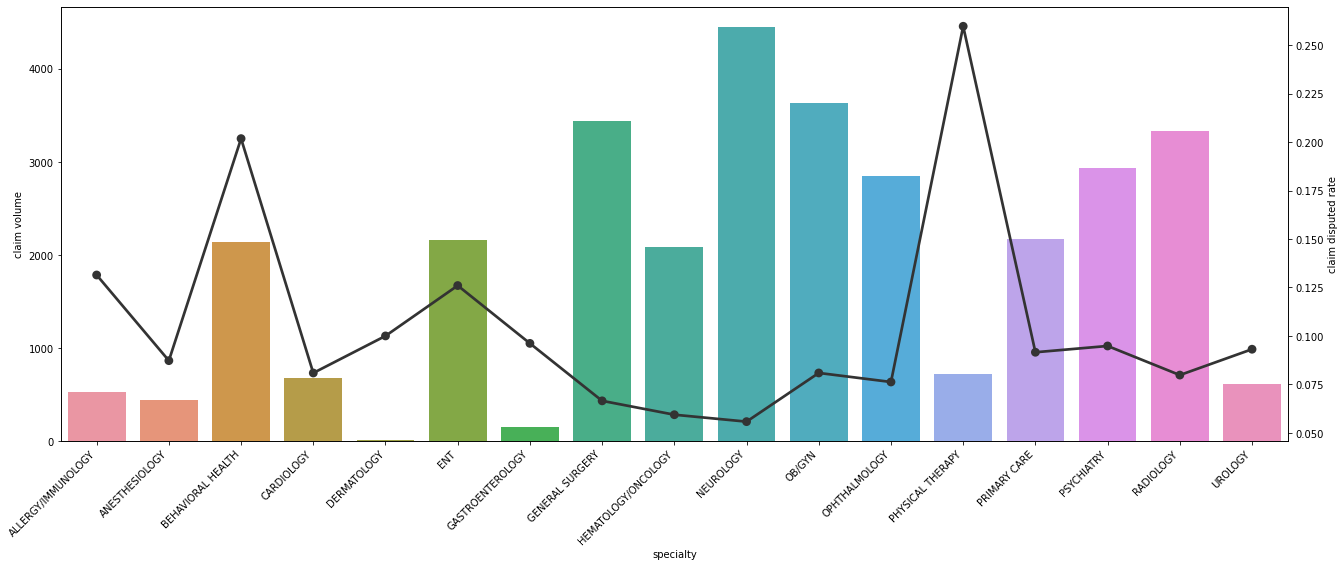

In [ ]:
fig, ax1 = plt.subplots(figsize=(22,8))
ax2 = ax1.twinx() # secondary y-axis

plt.xticks(rotation=90)
chart1=sns.barplot(x='specialty', y='claim_number', data=df2.groupby('specialty')['claim_number'].count().to_frame().reset_index(), ax=ax1) 
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right')
chart1.set_ylabel('claim volume')
chart2=sns.pointplot(x='specialty', y='claim_disputed', data=df2.groupby('specialty')['claim_disputed'].mean().to_frame().reset_index(),color='#333',  ax=ax2) 
chart2.set_ylabel('claim disputed rate')

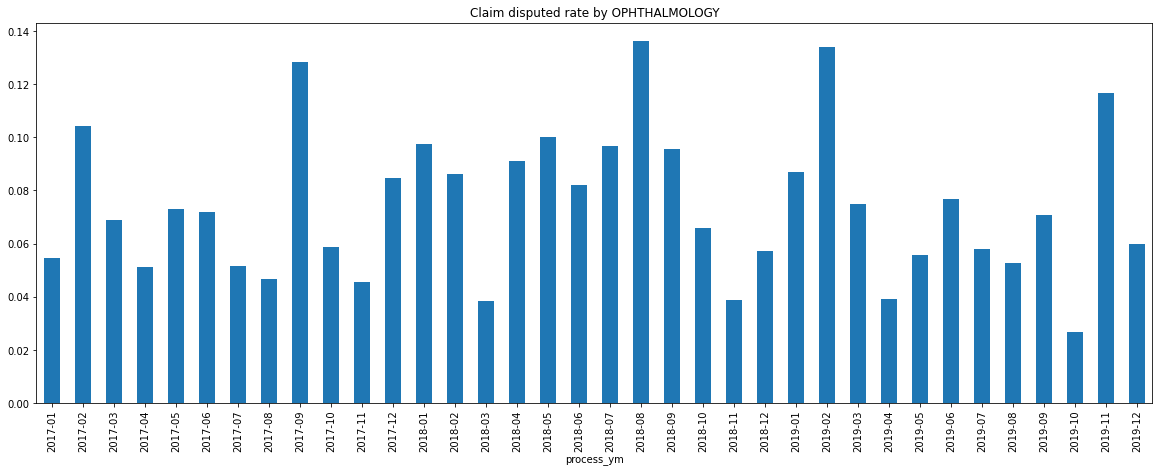

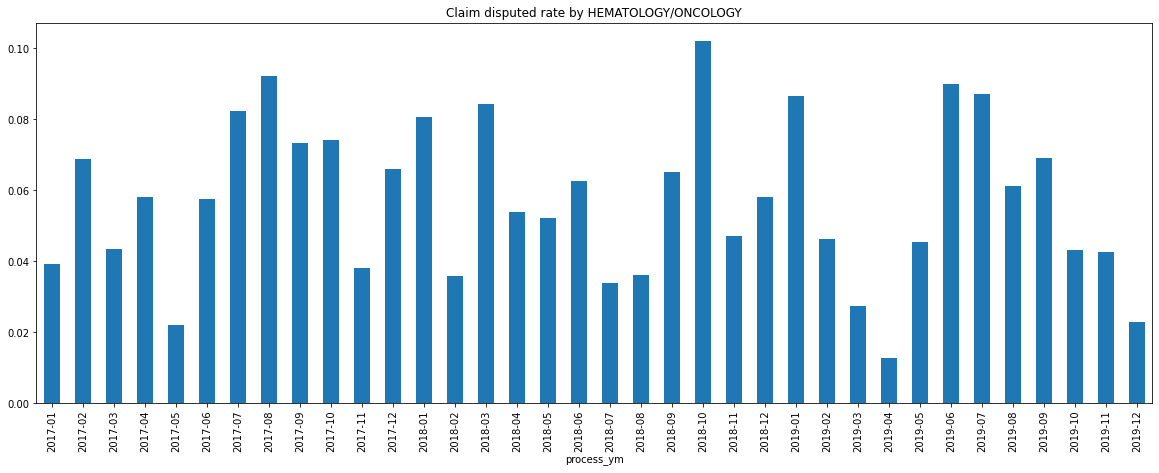

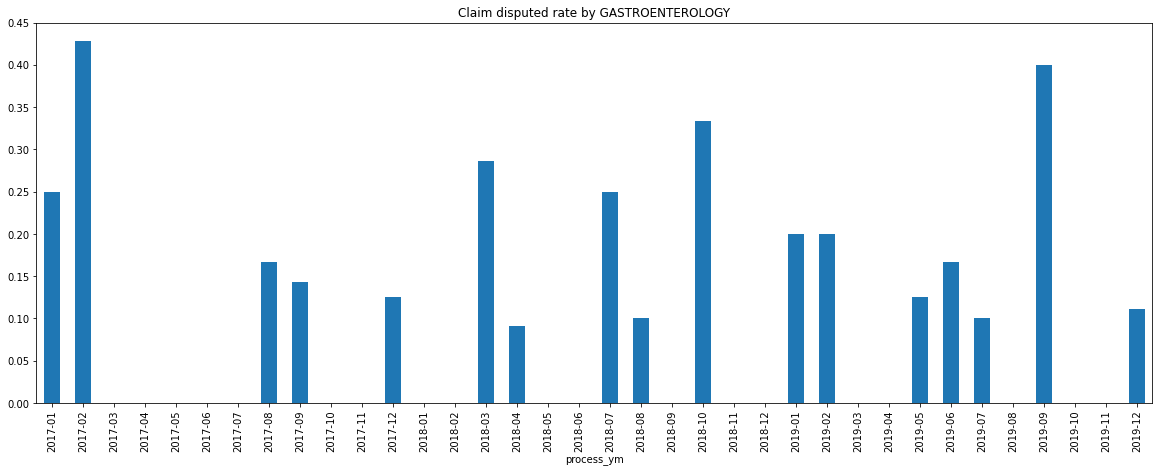

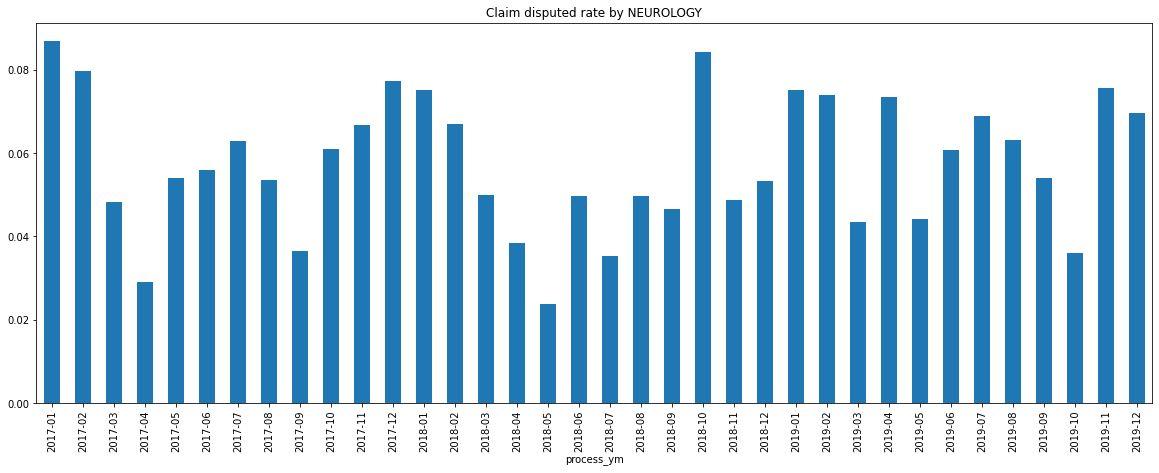

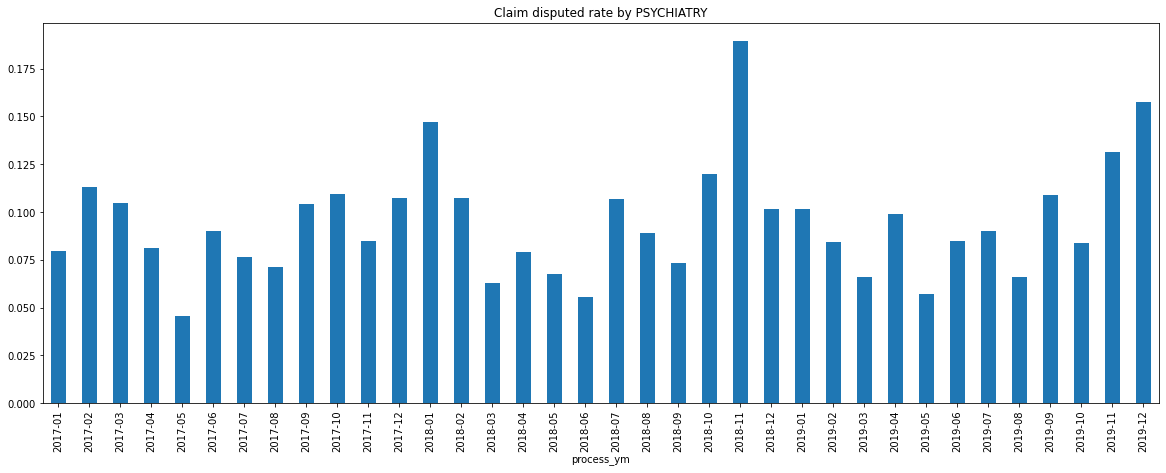

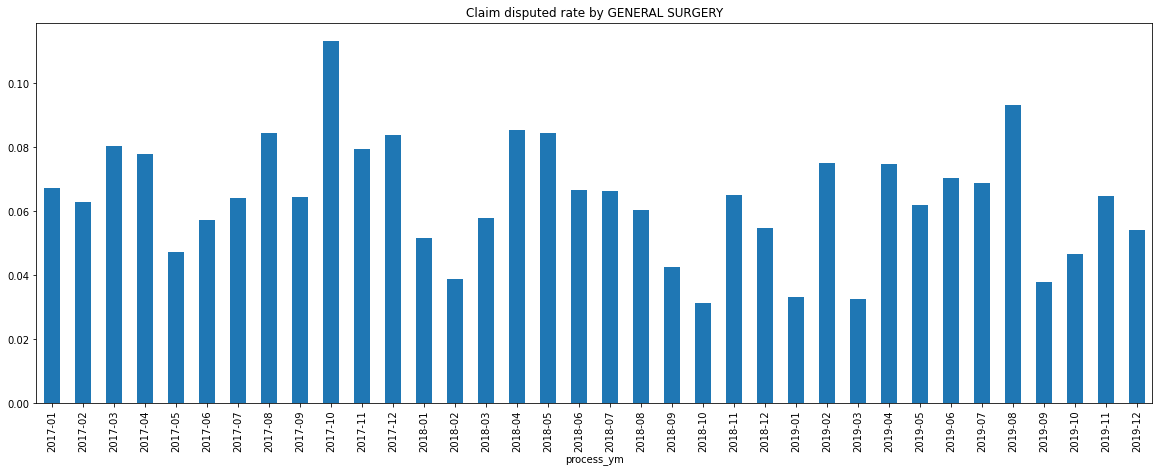

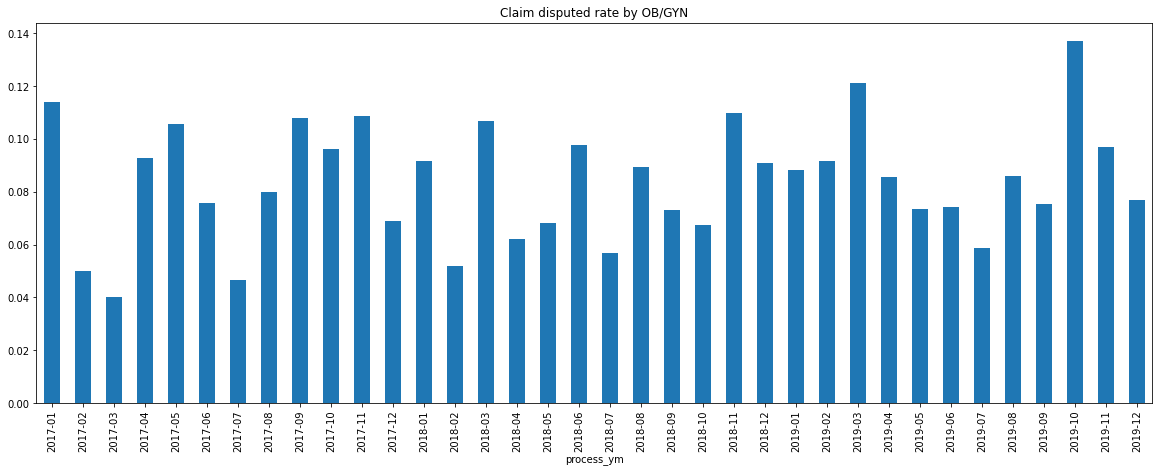

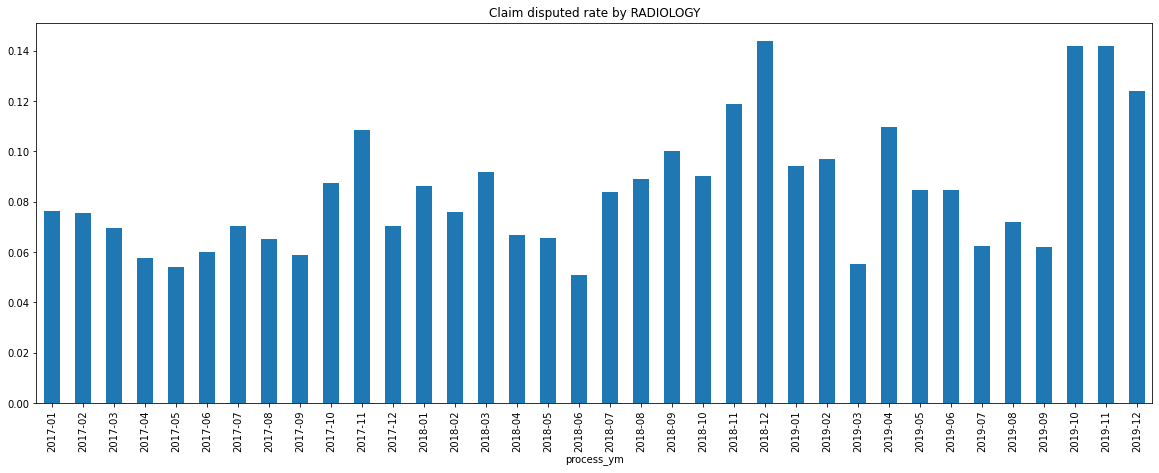

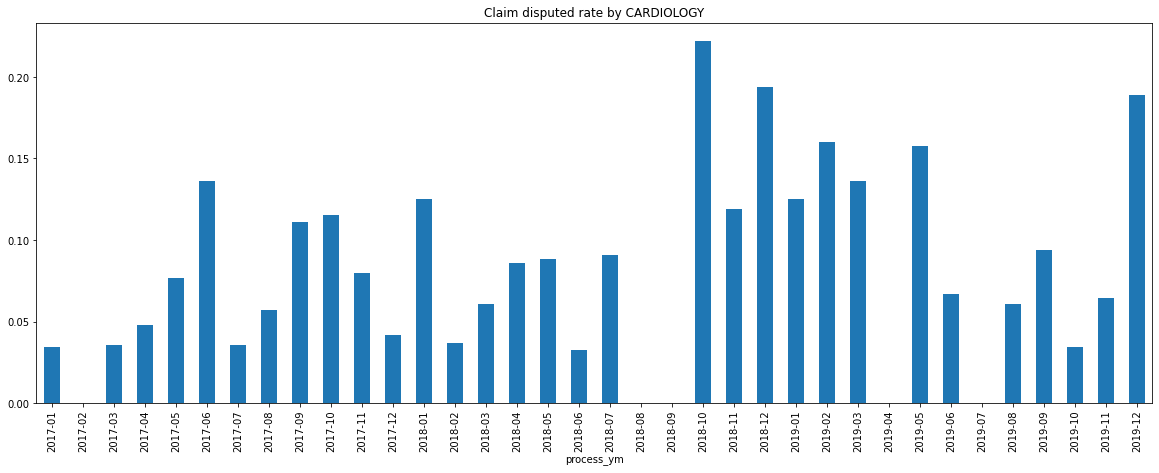

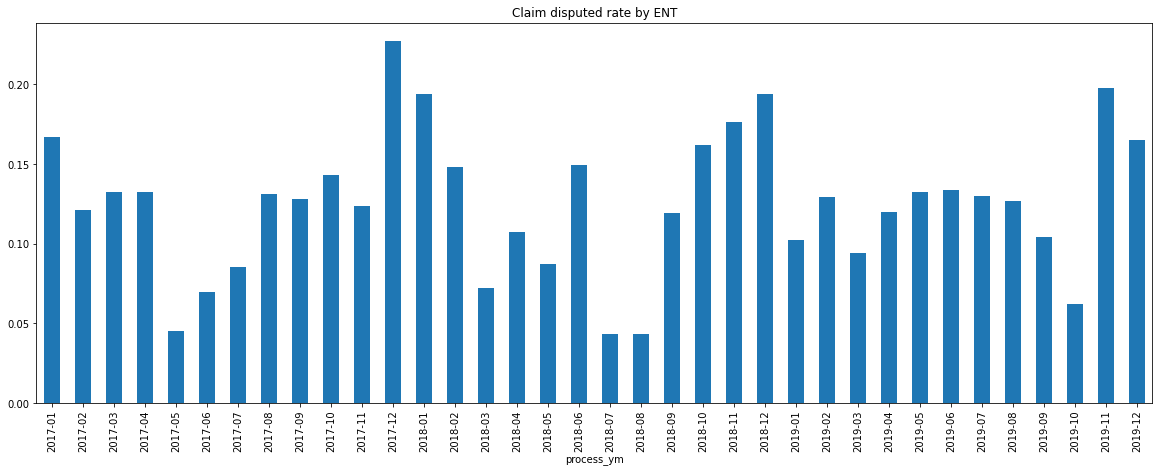

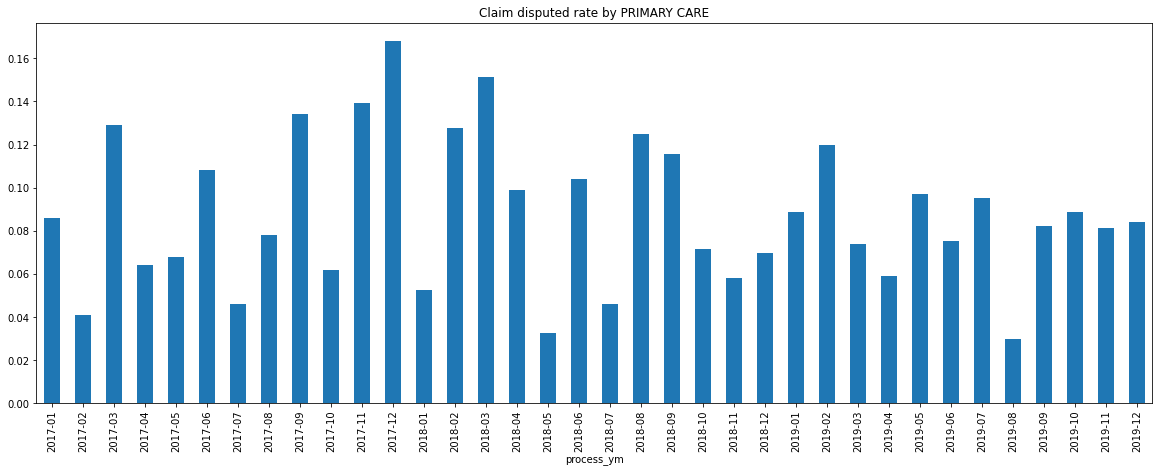

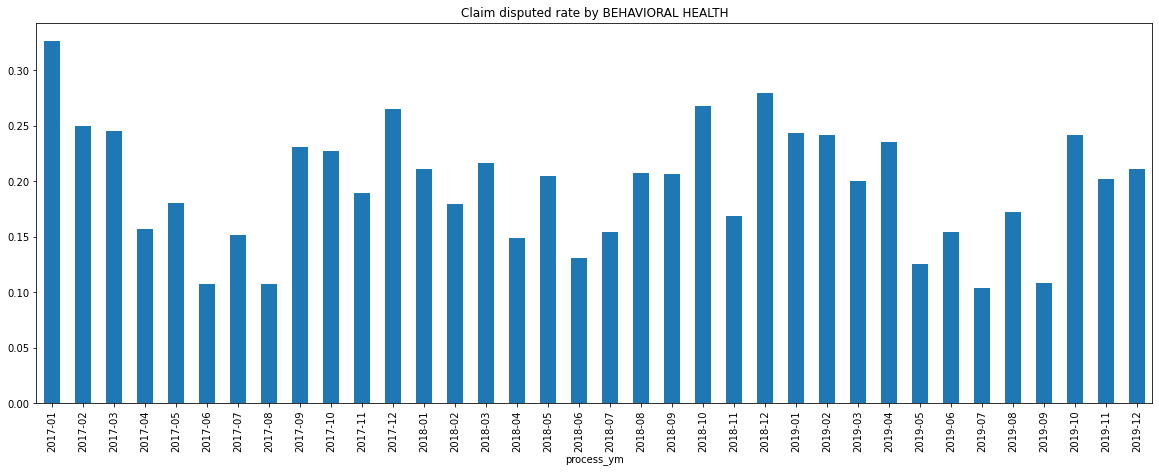

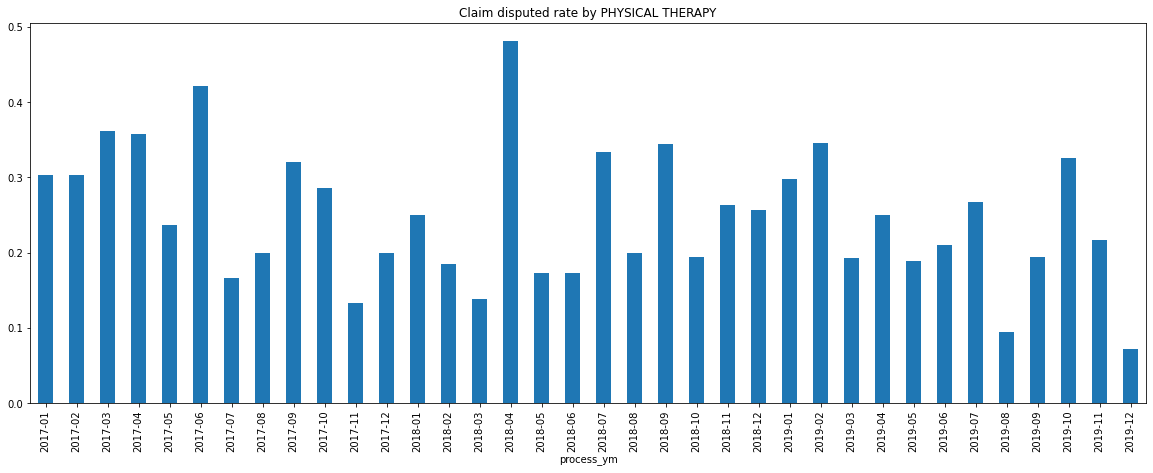

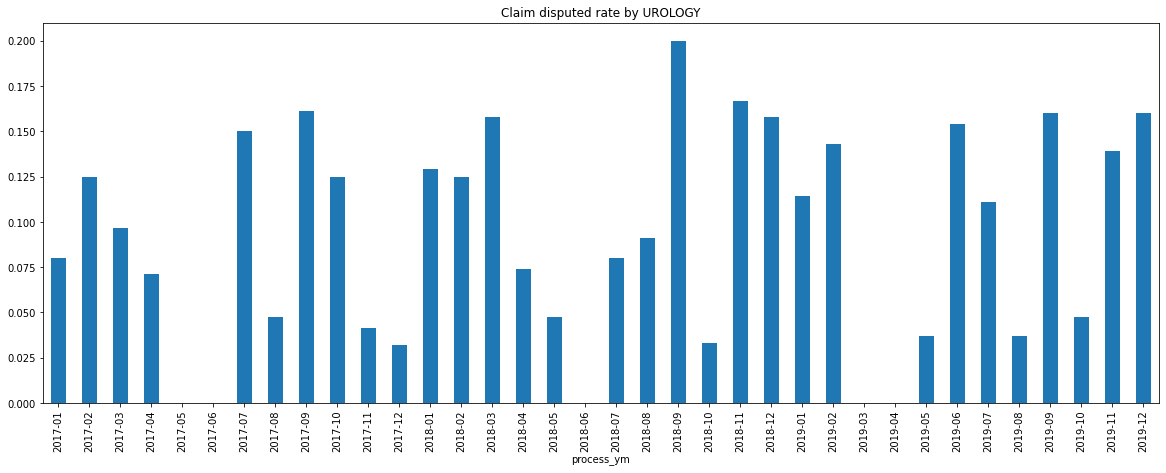

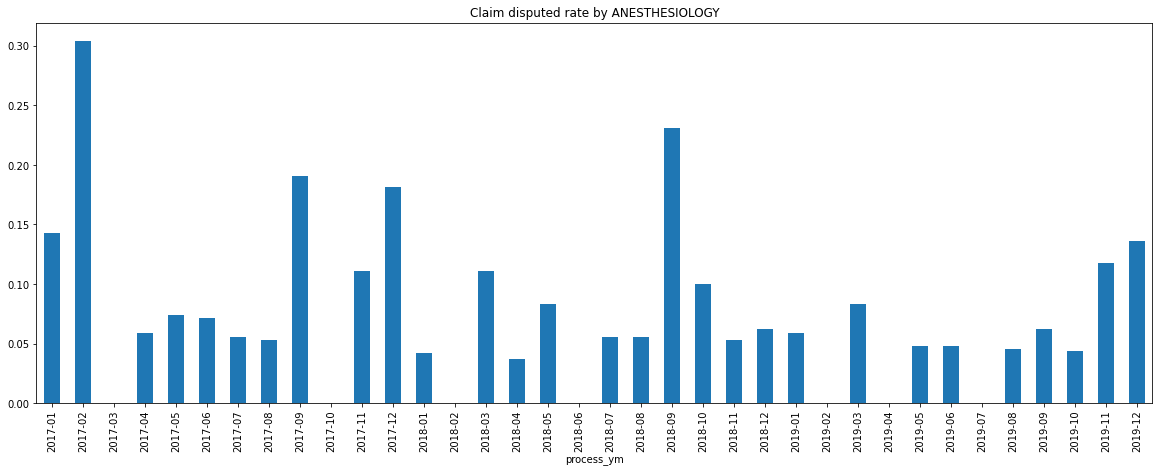

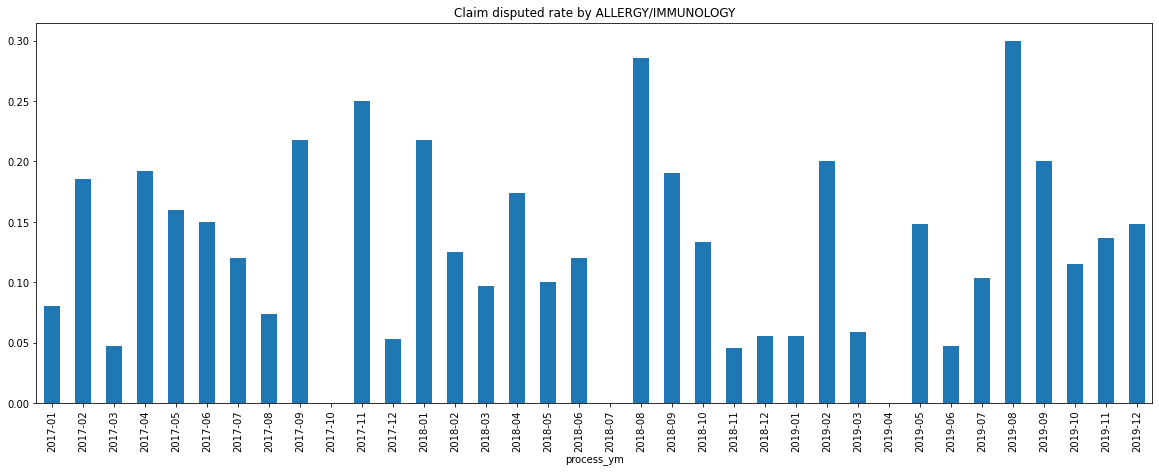

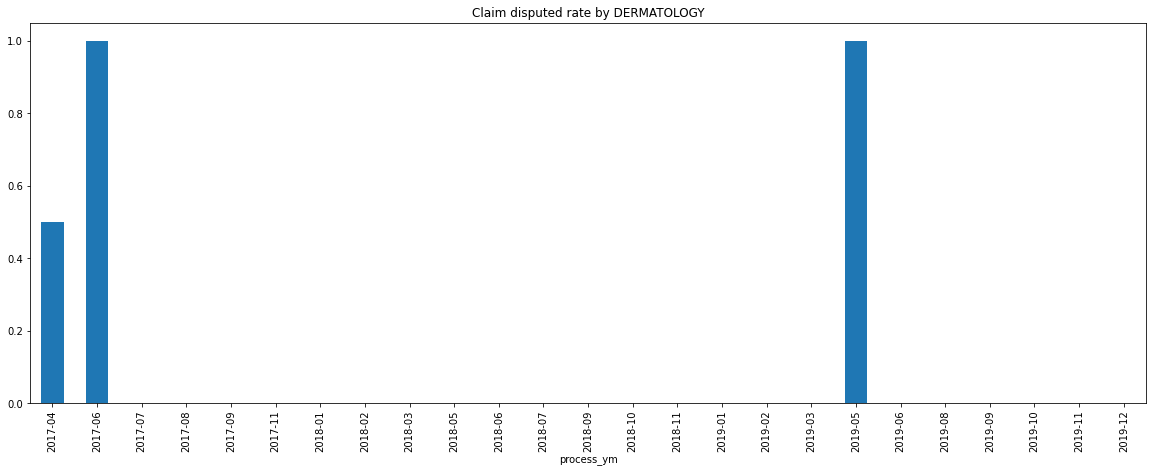

In [ ]:
for specialty in df['specialty'].unique():
    plt.figure(figsize=(20,7))
    df[df['specialty']==specialty].groupby('process_ym')['claim_disputed'].mean().plot.bar()
    plt.title(f'Claim disputed rate by {specialty}')
    plt.show()

### billed amount by specialty inspection

In [ ]:
df[df['specialty']=='BEHAVIORAL HEALTH'].sort_values('billed_amount', ascending=False).head(10)
# The fraud rate is so much higher in top billed amount claims

,claim_number,process_date,specialty,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,process_ym,process_month,process_year,process_dom,process_dow,billed_amount_rank,bill_allow_diff,distance_bin
8671,826683780,2017-07-15,BEHAVIORAL HEALTH,866.390,905.130,8,M,26.000,0,0,0.000,2017-07,7,2017,15,5,1.000,-38.740,grp2: 5-9
31463,356247309,2018-12-12,BEHAVIORAL HEALTH,847.780,960.200,0,F,42.000,1,1,960.200,2018-12,12,2018,12,2,1.000,-112.420,grp0: 0
29689,396661465,2018-11-01,BEHAVIORAL HEALTH,818.760,855.460,6,F,15.000,0,0,0.000,2018-11,11,2018,1,3,0.999,-36.700,grp2: 5-9
6703,938133428,2017-05-29,BEHAVIORAL HEALTH,728.140,665.530,12,M,15.000,0,0,0.000,2017-05,5,2017,29,0,0.999,62.610,grp3: 10-24
47972,792286467,2019-12-17,BEHAVIORAL HEALTH,694.870,694.310,1,NaN,19.000,1,1,694.310,2019-12,12,2019,17,1,0.999,0.560,grp1: 1-4
31933,568248935,2018-12-23,BEHAVIORAL HEALTH,687.100,658.940,3,F,NaN,0,0,0.000,2018-12,12,2018,23,6,0.998,28.160,grp1: 1-4
36575,693048789,2019-04-05,BEHAVIORAL HEALTH,680.660,680.120,0,F,4.000,1,1,680.120,2019-04,4,2019,5,4,0.998,0.540,grp0: 0
9202,595346877,2017-07-28,BEHAVIORAL HEALTH,670.840,697.580,5,F,50.000,0,0,0.000,2017-07,7,2017,28,4,0.998,-26.740,grp2: 5-9
17474,532694010,2018-01-31,BEHAVIORAL HEALTH,660.100,670.000,6,F,3.000,1,1,670.000,2018-01,1,2018,31,2,0.998,-9.900,grp2: 5-9
16269,724522150,2018-01-05,BEHAVIORAL HEALTH,653.380,657.170,1,M,24.000,1,1,657.170,2018-01,1,2018,5,4,0.997,-3.790,grp1: 1-4


In [ ]:
df[df['specialty']=='PHYSICAL THERAPY'].sort_values('billed_amount', ascending=False).head(10)
# The fraud rate is so much higher in top billed amount claims

,claim_number,process_date,specialty,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,process_ym,process_month,process_year,process_dom,process_dow
5083,397387597,2017-04-21,PHYSICAL THERAPY,698.240,741.670,0,F,56.000,1,1,741.670,2017-04,4,2017,21,4
41043,959332941,2019-07-15,PHYSICAL THERAPY,693.570,702.450,3,NaN,14.000,1,1,702.450,2019-07,7,2019,15,0
12797,367295112,2017-10-18,PHYSICAL THERAPY,682.970,697.180,12,M,9.000,1,1,697.180,2017-10,10,2017,18,2
20411,762381614,2018-04-06,PHYSICAL THERAPY,663.320,666.370,3,M,5.000,1,1,666.370,2018-04,4,2018,6,4
3800,868792061,2017-03-23,PHYSICAL THERAPY,616.140,592.890,0,F,NaN,0,0,0.000,2017-03,3,2017,23,3
13832,652159731,2017-11-11,PHYSICAL THERAPY,592.560,592.330,1,F,30.000,0,0,0.000,2017-11,11,2017,11,5
9691,369151348,2017-08-09,PHYSICAL THERAPY,579.470,588.470,0,F,51.000,0,0,0.000,2017-08,8,2017,9,2
43182,787632955,2019-09-01,PHYSICAL THERAPY,572.460,562.970,54,NaN,37.000,0,0,0.000,2019-09,9,2019,1,6
18379,699288059,2018-02-20,PHYSICAL THERAPY,539.550,557.370,5,M,10.000,0,0,0.000,2018-02,2,2018,20,1
5354,932244976,2017-04-28,PHYSICAL THERAPY,537.040,548.640,0,F,5.000,1,1,548.640,2017-04,4,2017,28,4


### billed amount distribution by claim disputed or not

<Axes: xlabel='claim_disputed', ylabel='billed_amount'>

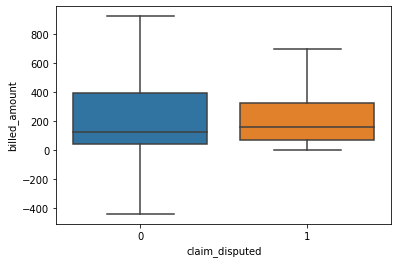

In [ ]:
sns.boxplot(y = 'billed_amount', x = 'claim_disputed', data = df, showfliers= False)

### billed amount rank distribution by claim disputed or not

<Axes: xlabel='claim_disputed', ylabel='billed_amount_rank'>

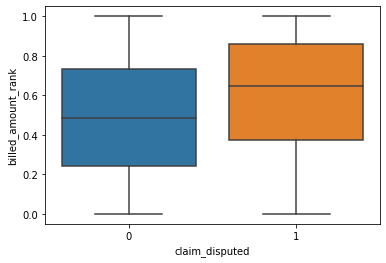

In [ ]:
df['billed_amount_rank'] = df.groupby('specialty')['billed_amount'].rank(pct=True)
sns.boxplot(y = 'billed_amount_rank', x = 'claim_disputed', data = df, showfliers= False)

### allowed amount distribution by claim disputed or not

<Axes: xlabel='claim_disputed', ylabel='allowed_amount'>

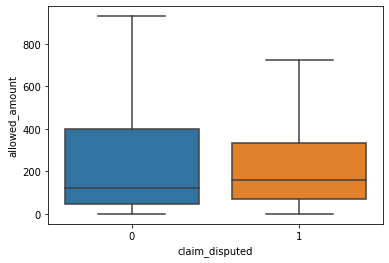

In [ ]:
sns.boxplot(y = 'allowed_amount', x = 'claim_disputed', data = df, showfliers= False)

### billed allowed amount difference distribution by claim disputed or not

<Axes: xlabel='claim_disputed', ylabel='bill_allow_diff'>

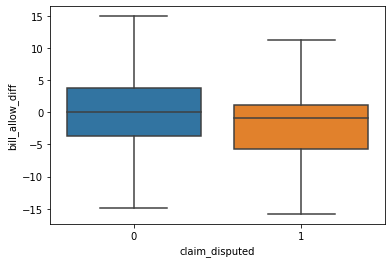

In [ ]:
df['bill_allow_diff'] = df['billed_amount'] - df['allowed_amount']
sns.boxplot(y = 'bill_allow_diff', x = 'claim_disputed', data = df, showfliers= False)

### drive distance 

<Axes: xlabel='claim_disputed', ylabel='drive_distance'>

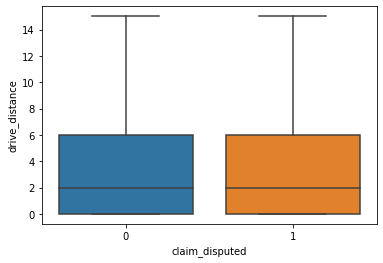

In [ ]:
sns.boxplot(y = 'drive_distance', x = 'claim_disputed', data = df, showfliers= False)

In [ ]:
df['drive_distance'].quantile([0,0.1,0.25,0.5,0.75,0.9,0.95,0.98,0.99,1])

0.000    0.000
0.100    0.000
0.250    0.000
0.500    2.000
0.750    6.000
0.900   13.000
0.950   19.000
0.980   26.000
0.990   32.000
1.000   99.000
Name: drive_distance, dtype: float64

In [ ]:
def distance_bin(x):
    if x == 0:
        return 'grp0: 0'
    elif x < 5:
        return 'grp1: 1-4'
    elif x <10:
        return 'grp2: 5-9'
    elif x <25:
        return 'grp3: 10-24'
    elif x <32:
        return 'grp4: 25-31'
    else:
        return 'grp5: >=32'

In [ ]:
df['distance_bin'] = df['drive_distance'].apply(distance_bin)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'grp0: 0'),
  Text(1, 0, 'grp1: 1-4'),
  Text(2, 0, 'grp2: 5-9'),
  Text(3, 0, 'grp3: 10-24'),
  Text(4, 0, 'grp4: 25-31'),
  Text(5, 0, 'grp5: >=32')])

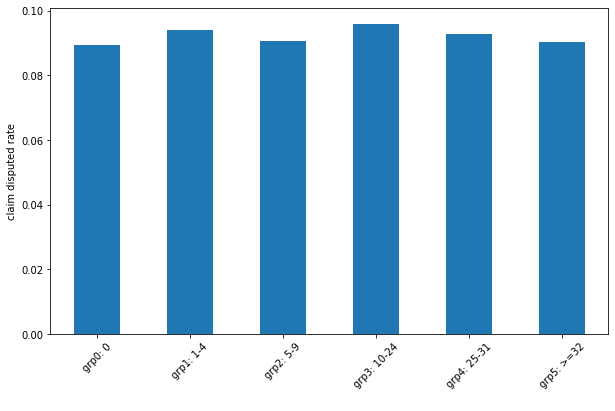

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('distance_bin')['claim_disputed'].mean().plot.bar() 
plt.xlabel(' ')
plt.ylabel('claim disputed rate')
plt.xticks(rotation=45)

### provider gender

Text(0, 0.5, 'claim disputed rate')

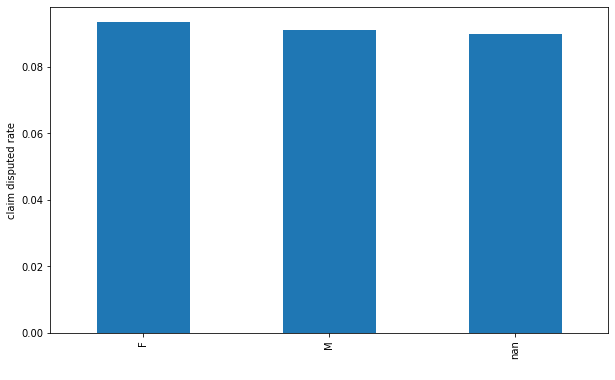

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('provider_gender', dropna=False)['claim_disputed'].mean().plot.bar()
plt.xlabel(' ')
plt.ylabel('claim disputed rate')

### member age

In [ ]:
def analyse_na_value(df, var):
    df = df.copy()    
    df[var] = np.where(df[var].isnull(), 'missing age', 'with age')    
    df.groupby(var)['claim_disputed'].mean().plot.bar()  # use .mean() for binary classification problem    
    plt.xlabel('')
    plt.ylabel('Claims disputed rate')
    plt.show()

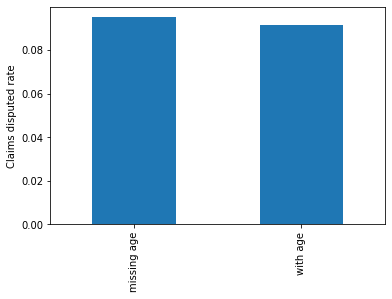

In [ ]:
analyse_na_value(df, 'member_age')

In [ ]:
df['member_age'].quantile([0,0.1,0.25,0.5,0.75,0.9,0.95,0.98,0.99,1])

0.000     0.000
0.100     9.000
0.250    20.000
0.500    29.000
0.750    40.000
0.900    55.000
0.950    60.000
0.980    63.000
0.990    64.000
1.000   183.534
Name: member_age, dtype: float64

In [ ]:
df[df['member_age']>=65]

,claim_number,process_date,specialty,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,process_ym,process_month,process_year,process_dom,process_dow,billed_amount_rank,bill_allow_diff,distance_bin,member_age2,age_bin
13937,930314080,2017-11-13,OPHTHALMOLOGY,90.570,91.350,1,M,141.975,0,0,0.000,2017-11,11,2017,13,0,0.550,-0.780,grp1: 1-4,141.975,grp8: >=65
33175,374174848,2019-01-18,OB/GYN,184.540,183.090,0,NaN,183.534,0,0,0.000,2019-01,1,2019,18,4,0.815,1.450,grp0: 0,183.534,grp8: >=65
36227,273406635,2019-03-29,PHYSICAL THERAPY,7.840,8.260,0,M,169.524,0,0,0.000,2019-03,3,2019,29,4,0.060,-0.420,grp0: 0,169.524,grp8: >=65


In [ ]:
df['member_age2']=df['member_age'].fillna(-1)

In [ ]:
def age_bin(x):
    if  x<0:
        return 'grp9: missing'
    elif x == 0:
        return 'grp0: 0'
    elif x < 6:
        return 'grp1: 1-5'
    elif x <12:
        return 'grp2: 6-11'
    elif x <19:
        return 'grp3: 12-18'
    elif x <31:
        return 'grp4: 19-30'
    elif x < 46:
        return 'grp5: 31-44'
    elif x < 56:
        return 'grp6: 45-54'
    elif x < 65:
        return 'grp7: 55-64'
    else:
        return 'grp8:  >=65'

In [ ]:
df['age_bin'] = df['member_age2'].apply(age_bin)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'grp0: 0'),
  Text(1, 0, 'grp1: 1-5'),
  Text(2, 0, 'grp2: 6-11'),
  Text(3, 0, 'grp3: 12-18'),
  Text(4, 0, 'grp4: 19-30'),
  Text(5, 0, 'grp5: 31-44'),
  Text(6, 0, 'grp6: 45-54'),
  Text(7, 0, 'grp7: 55-64'),
  Text(8, 0, 'grp8:  >=65'),
  Text(9, 0, 'grp9: missing')])

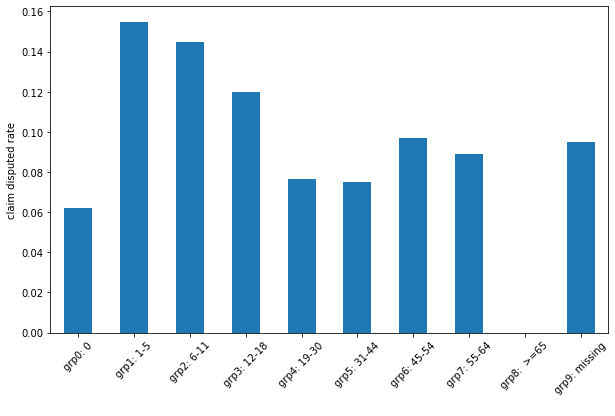

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('age_bin')['claim_disputed'].mean().plot.bar()
plt.xlabel(' ')
plt.ylabel('claim disputed rate')
plt.xticks(rotation=45)

In [ ]:
# specialty's min, median and max age

### check age distribution in different specialty

In [ ]:
df.groupby('specialty').agg(member_min_age = ('member_age', 'min'),
                             member_median_age = ('member_age', 'median'),
                             member_max_age = ('member_age', 'max'))

,member_min_age,member_median_age,member_max_age
specialty,,,
ALLERGY/IMMUNOLOGY,0.000,30.000,64.000
ANESTHESIOLOGY,0.000,29.000,64.000
BEHAVIORAL HEALTH,0.000,29.000,64.000
CARDIOLOGY,0.000,29.000,64.000
DERMATOLOGY,2.000,26.000,62.000
ENT,0.000,29.000,64.000
GASTROENTEROLOGY,0.000,30.000,64.000
GENERAL SURGERY,0.000,29.000,64.000
HEMATOLOGY/ONCOLOGY,0.000,30.000,64.000


In [ ]:
df[(df['specialty']=='OB/GYN')&(df['member_age']==0)]

### EDA for feature engineering

In [ ]:
df.head()

,claim_number,process_date,specialty,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,loss_amount,process_ym,process_month,process_year,process_dom,process_dow
0,434549367,2017-01-01,OPHTHALMOLOGY,221.230,219.550,3,M,25.000,0,0,0.000,0.000,2017-01,1,2017,1,6
1,456540132,2017-01-01,HEMATOLOGY/ONCOLOGY,158.460,156.100,6,F,5.000,0,0,0.000,0.000,2017-01,1,2017,1,6
2,622006111,2017-01-01,GASTROENTEROLOGY,38.810,37.430,10,M,33.000,0,0,0.000,0.000,2017-01,1,2017,1,6
3,309919357,2017-01-01,NEUROLOGY,323.550,331.700,8,M,8.000,0,0,0.000,0.000,2017-01,1,2017,1,6
4,220920202,2017-01-01,PSYCHIATRY,29.350,30.370,0,M,6.000,0,1,30.370,30.370,2017-01,1,2017,1,6


In [ ]:
df.isnull().sum()/len(df)

claim_number      0.000
process_date      0.000
specialty         0.000
billed_amount     0.000
allowed_amount    0.000
drive_distance    0.000
provider_gender   0.101
member_age        0.152
isFraud           0.000
claim_disputed    0.000
disputed_amount   0.000
loss_amount       0.000
process_ym        0.000
process_month     0.000
process_year      0.000
process_dom       0.000
process_dow       0.000
dtype: float64

In [ ]:
df['provider_gender'].value_counts(dropna=False)

F      21958
M      21730
NaN     4900
Name: provider_gender, dtype: int64

### Feature engineering
1. one hot encoding: specialty, provider_gender, 
2. keep as it is: billed_amount, allowed_amount, drive_distance, member_age, 
3. drop: claim_number, process_date, isFraud, 
4. new feature: , 'bill_allow_diff', mnth_sin, mnth_cos, dow_sin, dow_cos, dom_sin, dom_cos, 
5. missing value: member_age, use median 

In [ ]:
# create new features
df['bill_allow_diff'] = df['billed_amount'] - df['allowed_amount']

In [ ]:
df['mnth_sin'] = np.sin((df['process_month'])*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df['process_month'])*(2.*np.pi/12))

df['dow_sin'] = np.sin((df['process_dow'])*(2.*np.pi/7))
df['dow_cos'] = np.cos((df['process_dow'])*(2.*np.pi/7))

df['dom_sin'] = np.sin((df['process_dom'])*(2.*np.pi/30.25))
df['dom_cos'] = np.cos((df['process_dom'])*(2.*np.pi/30.25))

In [ ]:
df['billed_amount_rank'] = df.groupby('specialty')['billed_amount'].rank(pct=True)

In [ ]:
df[['mnth_sin', 'mnth_cos', 'dow_sin', 'dow_cos', 'dom_sin', 'dom_cos']].describe()

,mnth_sin,mnth_cos,dow_sin,dow_cos,dom_sin,dom_cos
count,48588.000,48588.000,48588.000,48588.000,48588.000,48588.000
mean,0.001,0.007,0.001,0.006,0.003,0.012
std,0.708,0.707,0.707,0.707,0.707,0.707
min,-1.000,-1.000,-0.975,-0.901,-0.998,-1.000
25%,-0.866,-0.500,-0.782,-0.901,-0.721,-0.693
50%,-0.000,0.000,0.000,-0.223,0.026,0.065
75%,0.500,0.866,0.782,0.623,0.738,0.674
max,1.000,1.000,0.975,1.000,0.996,0.999


In [ ]:
# one hot encoding:
df['specialty_orig'] = df['specialty']
df_fe = pd.get_dummies(df, columns=['specialty', 'process_month'], drop_first=True)

In [ ]:
df_fe.head()

,claim_number,process_date,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,loss_amount,process_ym,process_year,process_dom,process_dow,bill_allow_diff,mnth_sin,mnth_cos,dow_sin,dow_cos,dom_sin,dom_cos,billed_amount_rank,specialty_orig,specialty_ANESTHESIOLOGY,specialty_BEHAVIORAL HEALTH,specialty_CARDIOLOGY,specialty_DERMATOLOGY,specialty_ENT,specialty_GASTROENTEROLOGY,specialty_GENERAL SURGERY,specialty_HEMATOLOGY/ONCOLOGY,specialty_NEUROLOGY,specialty_OB/GYN,specialty_OPHTHALMOLOGY,specialty_PHYSICAL THERAPY,specialty_PRIMARY CARE,specialty_PSYCHIATRY,specialty_RADIOLOGY,specialty_UROLOGY,process_month_2,process_month_3,process_month_4,process_month_5,process_month_6,process_month_7,process_month_8,process_month_9,process_month_10,process_month_11,process_month_12
0,434549367,2017-01-01,221.230,219.550,3,M,25.000,0,0,0.000,0.000,2017-01,2017,1,6,1.680,0.500,0.866,-0.782,0.623,0.206,0.979,0.862,OPHTHALMOLOGY,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,456540132,2017-01-01,158.460,156.100,6,F,5.000,0,0,0.000,0.000,2017-01,2017,1,6,2.360,0.500,0.866,-0.782,0.623,0.206,0.979,0.047,HEMATOLOGY/ONCOLOGY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,622006111,2017-01-01,38.810,37.430,10,M,33.000,0,0,0.000,0.000,2017-01,2017,1,6,1.380,0.500,0.866,-0.782,0.623,0.206,0.979,0.128,GASTROENTEROLOGY,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,309919357,2017-01-01,323.550,331.700,8,M,8.000,0,0,0.000,0.000,2017-01,2017,1,6,-8.150,0.500,0.866,-0.782,0.623,0.206,0.979,0.471,NEUROLOGY,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,220920202,2017-01-01,29.350,30.370,0,M,6.000,0,1,30.370,30.370,2017-01,2017,1,6,-1.020,0.500,0.866,-0.782,0.623,0.206,0.979,0.265,PSYCHIATRY,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_fe['provider_gender_nan'] = np.where(df_fe['provider_gender'].isnull(), 1, 0)
df_fe['provider_gender_F']= np.where(df_fe['provider_gender']=='F', 1, 0)
df_fe['provider_gender_F'].value_counts()

0    26630
1    21958
Name: provider_gender_F, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
df_fe.columns

Index(['claim_number', 'process_date', 'billed_amount', 'allowed_amount',
       'drive_distance', 'provider_gender', 'member_age', 'isFraud',
       'claim_disputed', 'disputed_amount', 'loss_amount', 'process_ym',
       'process_year', 'process_dom', 'process_dow', 'bill_allow_diff',
       'mnth_sin', 'mnth_cos', 'dow_sin', 'dow_cos', 'dom_sin', 'dom_cos',
       'billed_amount_rank', 'specialty_orig', 'specialty_ANESTHESIOLOGY',
       'specialty_BEHAVIORAL HEALTH', 'specialty_CARDIOLOGY',
       'specialty_DERMATOLOGY', 'specialty_ENT', 'specialty_GASTROENTEROLOGY',
       'specialty_GENERAL SURGERY', 'specialty_HEMATOLOGY/ONCOLOGY',
       'specialty_NEUROLOGY', 'specialty_OB/GYN', 'specialty_OPHTHALMOLOGY',
       'specialty_PHYSICAL THERAPY', 'specialty_PRIMARY CARE',
       'specialty_PSYCHIATRY', 'specialty_RADIOLOGY', 'specialty_UROLOGY',
       'process_month_2', 'process_month_3', 'process_month_4',
       'process_month_5', 'process_month_6', 'process_month_7',
       'p

In [ ]:
feature_list =['billed_amount', 'allowed_amount',  'drive_distance',  'member_age',           
       'bill_allow_diff', 'mnth_sin', 'mnth_cos', 'dow_sin', 'dow_cos',
       'dom_sin', 'dom_cos', 
       'specialty_ANESTHESIOLOGY',
       'specialty_BEHAVIORAL HEALTH', 'specialty_CARDIOLOGY',
       'specialty_DERMATOLOGY', 'specialty_ENT', 'specialty_GASTROENTEROLOGY',
       'specialty_GENERAL SURGERY', 'specialty_HEMATOLOGY/ONCOLOGY',
       'specialty_NEUROLOGY', 'specialty_OB/GYN', 'specialty_OPHTHALMOLOGY',
       'specialty_PHYSICAL THERAPY', 'specialty_PRIMARY CARE',
       'specialty_PSYCHIATRY', 'specialty_RADIOLOGY', 'specialty_UROLOGY',
       'provider_gender_nan', 'provider_gender_F', 'billed_amount_rank',
       ]

In [ ]:
train = df_fe[(df_fe['process_date']<pd.to_datetime('2019-10-01'))]

In [ ]:
test = df_fe[(df_fe['process_date']>=pd.to_datetime('2019-10-01'))]

In [ ]:
train['member_age'] = train['member_age'].fillna(train['member_age'].median())
train['billed_amount_rank'] = train.groupby('specialty_orig')['billed_amount'].rank(pct=True)
# truncate drive_distance and member_age
for col in ['drive_distance', 'member_age']:
    train[col] = np.where(train[col]> train[col].quantile(0.9), train[col].quantile(0.9), train[col])

In [ ]:
X_train = train[feature_list]
y_train = train['claim_disputed']

In [ ]:
test['member_age'] = test['member_age'].fillna(train['member_age'].median())
test['billed_amount_rank'] = test.groupby('specialty_orig')['billed_amount'].rank(pct=True)
# truncate drive_distance and member_age
for col in ['drive_distance', 'member_age']:
    test[col] = np.where(test[col]> train[col].quantile(0.9), train[col].quantile(0.9), test[col])

In [ ]:
for col in ['drive_distance', 'member_age']:
    test[col] = np.where(test[col]> train[col].quantile(0.9), train[col].quantile(0.9), test[col])

In [ ]:
X_test = test[feature_list]
y_test = test['claim_disputed']

In [ ]:
1/y_train.mean()

10.980721700444883

In [ ]:
X_train.head()

,billed_amount,allowed_amount,drive_distance,member_age,bill_allow_diff,mnth_sin,mnth_cos,dow_sin,dow_cos,dom_sin,dom_cos,specialty_ANESTHESIOLOGY,specialty_BEHAVIORAL HEALTH,specialty_CARDIOLOGY,specialty_DERMATOLOGY,specialty_ENT,specialty_GASTROENTEROLOGY,specialty_GENERAL SURGERY,specialty_HEMATOLOGY/ONCOLOGY,specialty_NEUROLOGY,specialty_OB/GYN,specialty_OPHTHALMOLOGY,specialty_PHYSICAL THERAPY,specialty_PRIMARY CARE,specialty_PSYCHIATRY,specialty_RADIOLOGY,specialty_UROLOGY,provider_gender_nan,provider_gender_F,billed_amount_rank
0,221.230,219.550,3.000,25.000,1.680,0.500,0.866,-0.782,0.623,0.206,0.979,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.864
1,158.460,156.100,6.000,5.000,2.360,0.500,0.866,-0.782,0.623,0.206,0.979,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.047
2,38.810,37.430,10.000,33.000,1.380,0.500,0.866,-0.782,0.623,0.206,0.979,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.121
3,323.550,331.700,8.000,8.000,-8.150,0.500,0.866,-0.782,0.623,0.206,0.979,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.469
4,29.350,30.370,0.000,6.000,-1.020,0.500,0.866,-0.782,0.623,0.206,0.979,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.264


In [ ]:
xgb_model = XGBClassifier(learning_rate = 0.01,
                    objective = 'binary:logistic',
                    eval_metric = 'auc',
                    scale_pos_weight = 11,
                    seed = 42,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    min_child_weight=50,
                    max_depth = 4,
                    reg_lambda = 10
                    )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=50, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_train_probs = xgb_model.predict_proba(X_train)
xgb_test_probs = xgb_model.predict_proba(X_test)
print('XGboost train AUC:', roc_auc_score(y_train, xgb_train_probs[:,1]))
print('XGboost test AUC:', roc_auc_score(y_test, xgb_test_probs[:,1]))

XGboost train AUC: 0.6994181163071119
XGboost test AUC: 0.6919966618585409


In [ ]:
proba= xgb_model.predict_proba(X_test)[:,1]
proba_df = pd.DataFrame(proba)
proba_df.columns=['pred_prob']

In [ ]:
test.reset_index(drop=True, inplace=True)
proba_df.reset_index(drop=True, inplace=True)
test_pred = pd.concat([test, proba_df], axis=1)
test_pred.head(5)

,claim_number,process_date,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,loss_amount,process_ym,process_year,process_dom,process_dow,bill_allow_diff,mnth_sin,mnth_cos,dow_sin,dow_cos,dom_sin,dom_cos,billed_amount_rank,specialty_orig,specialty_ANESTHESIOLOGY,specialty_BEHAVIORAL HEALTH,specialty_CARDIOLOGY,specialty_DERMATOLOGY,specialty_ENT,specialty_GASTROENTEROLOGY,specialty_GENERAL SURGERY,specialty_HEMATOLOGY/ONCOLOGY,specialty_NEUROLOGY,specialty_OB/GYN,specialty_OPHTHALMOLOGY,specialty_PHYSICAL THERAPY,specialty_PRIMARY CARE,specialty_PSYCHIATRY,specialty_RADIOLOGY,specialty_UROLOGY,process_month_2,process_month_3,process_month_4,process_month_5,process_month_6,process_month_7,process_month_8,process_month_9,process_month_10,process_month_11,process_month_12,provider_gender_nan,provider_gender_F,pred_prob
0,347373405,2019-10-01,581.690,550.450,3.000,F,3.000,0,0,0.000,0.000,2019-10,2019,1,1,31.240,-0.866,0.500,0.782,0.623,0.206,0.979,0.236,GENERAL SURGERY,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.437
1,432836500,2019-10-01,26.280,27.160,5.000,M,31.000,0,0,0.000,0.000,2019-10,2019,1,1,-0.880,-0.866,0.500,0.782,0.623,0.206,0.979,0.266,PSYCHIATRY,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.468
2,653021280,2019-10-01,74.210,68.950,6.000,M,0.000,0,0,0.000,0.000,2019-10,2019,1,1,5.260,-0.866,0.500,0.782,0.623,0.206,0.979,0.522,RADIOLOGY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.427
3,913013514,2019-10-01,386.330,378.270,6.000,M,50.000,0,0,0.000,0.000,2019-10,2019,1,1,8.060,-0.866,0.500,0.782,0.623,0.206,0.979,0.536,NEUROLOGY,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.424
4,199250232,2019-10-01,119.890,125.000,0.000,M,24.000,0,0,0.000,0.000,2019-10,2019,1,1,-5.110,-0.866,0.500,0.782,0.623,0.206,0.979,0.700,OB/GYN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.545


In [ ]:
test_pred[['claim_number', 'process_date', 'specialty_orig', 
'billed_amount',     
'allowed_amount',   
'drive_distance',     
'provider_gender',   
'member_age',        
'pred_prob']].sort_values('pred_prob', ascending=False).head()

,claim_number,process_date,specialty_orig,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,pred_prob
4057,492470583,2019-12-29,BEHAVIORAL HEALTH,326.820,340.700,13.000,M,2.000,0.741
2781,208430640,2019-12-01,BEHAVIORAL HEALTH,263.900,270.970,12.000,M,13.000,0.741
2212,393537459,2019-11-18,BEHAVIORAL HEALTH,252.490,266.820,2.000,F,7.000,0.741
944,429518427,2019-10-21,BEHAVIORAL HEALTH,323.470,330.580,1.000,M,9.000,0.740
2446,268047927,2019-11-23,BEHAVIORAL HEALTH,302.160,317.020,0.000,F,6.000,0.740


### explore different cutoffs

In [ ]:
train['claim_disputed'].mean()

0.0910686954173044

In [ ]:
test_pred['pred_prob'].quantile([0,0.1,0.25,0.5,0.75,0.9,0.91,0.95,1])

0.000   0.364
0.100   0.421
0.250   0.436
0.500   0.480
0.750   0.529
0.900   0.605
0.910   0.608
0.950   0.633
1.000   0.741
Name: pred_prob, dtype: float64

In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

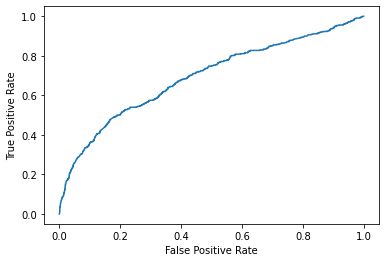

In [ ]:
plot_roc_curve(y_test, xgb_test_probs[:,1])

### cutoff by empirical fraud rate

In [ ]:
test_pred['pred_empirical']=np.where(test_pred['pred_prob']>=0.608, 1, 0)
print(test_pred['pred_empirical'].sum()/len(test_pred))
print(classification_report(y_test, test_pred['pred_empirical']))

0.08966346153846154
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3732
           1       0.34      0.29      0.31       428

    accuracy                           0.87      4160
   macro avg       0.63      0.61      0.62      4160
weighted avg       0.86      0.87      0.86      4160



### optimal cutoff

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    ####################################
    # The optimal cut off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(y_test, xgb_test_probs[:,1])

In [ ]:
threshold

[0.48845812678337097]

In [ ]:
test_pred['pred_optimal']=np.where(test_pred['pred_prob']>=0.4885, 1, 0)
print(test_pred['pred_optimal'].sum()/len(test_pred))
print(classification_report(y_test, test_pred['pred_optimal']))

0.38822115384615385
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      3732
           1       0.17      0.64      0.27       428

    accuracy                           0.64      4160
   macro avg       0.55      0.64      0.52      4160
weighted avg       0.86      0.64      0.71      4160



### cutoff 0.529

In [ ]:
test_pred['pred_0.529']=np.where(test_pred['pred_prob']>=0.529, 1, 0)
print(test_pred['pred_0.529'].sum()/len(test_pred))
print(classification_report(y_test, test_pred['pred_0.529']))

0.25048076923076923
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      3732
           1       0.22      0.53      0.31       428

    accuracy                           0.76      4160
   macro avg       0.58      0.65      0.58      4160
weighted avg       0.86      0.76      0.80      4160



cutoff 0.48

In [ ]:
test_pred['pred_0.48']=np.where(test_pred['pred_prob']>=0.48, 1, 0)
print(test_pred['pred_0.48'].sum()/len(test_pred))
print(classification_report(y_test, test_pred['pred_0.48']))

0.4971153846153846
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      3732
           1       0.15      0.72      0.25       428

    accuracy                           0.55      4160
   macro avg       0.55      0.63      0.46      4160
weighted avg       0.86      0.55      0.63      4160



### cutoff 0.436

In [ ]:
test_pred['pred_0.436']=np.where(test_pred['pred_prob']>=0.436, 1, 0)
print(test_pred['pred_0.436'].sum()/len(test_pred))
print(classification_report(y_test, test_pred['pred_0.436']))

0.7567307692307692
              precision    recall  f1-score   support

           0       0.94      0.26      0.40      3732
           1       0.12      0.87      0.21       428

    accuracy                           0.32      4160
   macro avg       0.53      0.56      0.31      4160
weighted avg       0.86      0.32      0.38      4160



### feature importance

In [ ]:
feature_imp_xgb = pd.Series(index=X_train.columns, data=xgb_model.feature_importances_).sort_values(ascending=False)
feature_imp_xgb[:10]

billed_amount_rank            0.152
specialty_BEHAVIORAL HEALTH   0.133
specialty_PHYSICAL THERAPY    0.112
bill_allow_diff               0.094
specialty_NEUROLOGY           0.091
specialty_ENT                 0.079
billed_amount                 0.055
allowed_amount                0.053
member_age                    0.045
specialty_OPHTHALMOLOGY       0.022
dtype: float32

In [ ]:
!pip install shap

In [ ]:
import shap

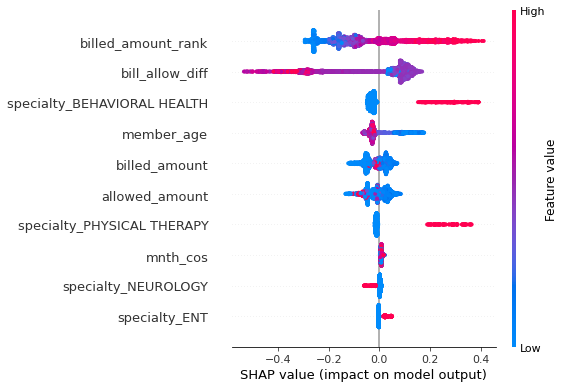

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, max_display=10)

In [ ]:
test_pred.head()

,claim_number,process_date,billed_amount,allowed_amount,drive_distance,provider_gender,member_age,isFraud,claim_disputed,disputed_amount,loss_amount,process_ym,process_year,process_dom,process_dow,bill_allow_diff,mnth_sin,mnth_cos,dow_sin,dow_cos,dom_sin,dom_cos,billed_amount_rank,specialty_orig,specialty_ANESTHESIOLOGY,specialty_BEHAVIORAL HEALTH,specialty_CARDIOLOGY,specialty_DERMATOLOGY,specialty_ENT,specialty_GASTROENTEROLOGY,specialty_GENERAL SURGERY,specialty_HEMATOLOGY/ONCOLOGY,specialty_NEUROLOGY,specialty_OB/GYN,specialty_OPHTHALMOLOGY,specialty_PHYSICAL THERAPY,specialty_PRIMARY CARE,specialty_PSYCHIATRY,specialty_RADIOLOGY,specialty_UROLOGY,process_month_2,process_month_3,process_month_4,process_month_5,process_month_6,process_month_7,process_month_8,process_month_9,process_month_10,process_month_11,process_month_12,provider_gender_nan,provider_gender_F,pred_prob,pred_optimal,pred_0.529,pred_empirical,pred_0.48,pred_0.436
0,347373405,2019-10-01,581.690,550.450,3.000,F,3.000,0,0,0.000,0.000,2019-10,2019,1,1,31.240,-0.866,0.500,0.782,0.623,0.206,0.979,0.236,GENERAL SURGERY,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.437,0,0,0,0,1
1,432836500,2019-10-01,26.280,27.160,5.000,M,31.000,0,0,0.000,0.000,2019-10,2019,1,1,-0.880,-0.866,0.500,0.782,0.623,0.206,0.979,0.266,PSYCHIATRY,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.468,0,0,0,0,1
2,653021280,2019-10-01,74.210,68.950,6.000,M,0.000,0,0,0.000,0.000,2019-10,2019,1,1,5.260,-0.866,0.500,0.782,0.623,0.206,0.979,0.522,RADIOLOGY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.427,0,0,0,0,0
3,913013514,2019-10-01,386.330,378.270,6.000,M,50.000,0,0,0.000,0.000,2019-10,2019,1,1,8.060,-0.866,0.500,0.782,0.623,0.206,0.979,0.536,NEUROLOGY,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.424,0,0,0,0,0
4,199250232,2019-10-01,119.890,125.000,0.000,M,24.000,0,0,0.000,0.000,2019-10,2019,1,1,-5.110,-0.866,0.500,0.782,0.623,0.206,0.979,0.700,OB/GYN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.545,1,1,0,1,1


In [ ]:
for spec in test_pred['specialty_orig'].unique():
    spec_test = test_pred[test_pred['specialty_orig']==spec]
    print(f'classification report for {spec}')
    print(len(spec_test)/len(test_pred))
    print(classification_report(spec_test['claim_disputed'], spec_test['pred_0.529']))
    print('********************************************************************')

classification report for GENERAL SURGERY
0.10504807692307692
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       413
           1       0.21      0.29      0.24        24

    accuracy                           0.90       437
   macro avg       0.58      0.61      0.59       437
weighted avg       0.92      0.90      0.91       437

********************************************************************
classification report for PSYCHIATRY
0.08125
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       297
           1       0.26      0.61      0.36        41

    accuracy                           0.74       338
   macro avg       0.60      0.69      0.60       338
weighted avg       0.85      0.74      0.78       338

********************************************************************
classification report for RADIOLOGY
0.10216346153846154
              precision    recall  f1-score  